In [91]:
import pandas as pd
import numpy as np

import json

%matplotlib inline
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [130]:
df = pd.read_json('refugee-crisis-week02-sample1000.jsonl', lines = True, orient = 'columns')
df = df.astype(str).apply(lambda x: x.str.lower())
#df['postedTime'] = df['postedTime'].str.split('t')
df.head()

,actor,body,favoritesCount,generator,geo,gnip,id,inReplyTo,link,location,...,objectType,postedTime,provider,retweetCount,twitter_entities,twitter_extended_entities,twitter_filter_level,twitter_lang,twitter_quoted_status,verb
0,"{'objecttype': 'person', 'id': 'id:twitter.com...","no, these are belated responses against muslim...",0,"{'displayname': 'twitter web client', 'link': ...",nan,"{'matching_rules': [{'tag': 'asylum', 'id': 22...","tag:search.twitter.com,2005:645002534361374720",nan,http://twitter.com/sergeimirkat/statuses/64500...,nan,...,activity,2015-09-18t22:32:42.000z,"{'objecttype': 'service', 'displayname': 'twit...",0,"{'hashtags': [], 'trends': [], 'user_mentions'...",nan,low,en,"{'id': 'tag:search.twitter.com,2005:6450003329...",post
1,"{'objecttype': 'person', 'id': 'id:twitter.com...",rt @soccerst_: the refugee who was kicked by a...,0,"{'displayname': 'twitterfeed', 'link': 'http:/...",nan,"{'matching_rules': [{'tag': 'refugee', 'id': 7...","tag:search.twitter.com,2005:644649804014813184",nan,http://twitter.com/ourjournalism/statuses/6446...,nan,...,activity,2015-09-17t23:11:04.000z,"{'objecttype': 'service', 'displayname': 'twit...",0,"{'hashtags': [], 'trends': [], 'user_mentions'...",nan,low,en,nan,post
2,"{'objecttype': 'person', 'id': 'id:twitter.com...",to understand the demands of the 'refugee welc...,0,"{'displayname': 'twitter for blackberry', 'lin...",nan,"{'matching_rules': [{'tag': 'refugee', 'id': 7...","tag:search.twitter.com,2005:644650622793445376",nan,http://twitter.com/deola_o/statuses/6446506227...,nan,...,activity,2015-09-17t23:14:20.000z,"{'objecttype': 'service', 'displayname': 'twit...",0,"{'hashtags': [{'text': 'refugeeswelcome', 'ind...","{'media': [{'id': 644650622520836096, 'id_str'...",low,en,nan,post
3,"{'objecttype': 'person', 'id': 'id:twitter.com...",refugee crisis to test eu itself at summit of ...,0,"{'displayname': 'google', 'link': 'http://www....",nan,"{'matching_rules': [{'tag': 'refugee', 'id': 7...","tag:search.twitter.com,2005:645583492315791360",nan,http://twitter.com/theallradar/statuses/645583...,nan,...,activity,2015-09-20t13:01:13.000z,"{'objecttype': 'service', 'displayname': 'twit...",0,"{'hashtags': [], 'trends': [], 'user_mentions'...",nan,low,en,nan,post
4,"{'objecttype': 'person', 'id': 'id:twitter.com...",#news #stocks rpt--u.n. refugee hunger-relief ...,0,"{'displayname': 'twitterfeed', 'link': 'http:/...",nan,"{'matching_rules': [{'tag': 'refugee', 'id': 7...","tag:search.twitter.com,2005:645584051928109057",nan,http://twitter.com/daily_finances/statuses/645...,nan,...,activity,2015-09-20t13:03:27.000z,"{'objecttype': 'service', 'displayname': 'twit...",0,"{'hashtags': [{'text': 'news', 'indices': [0, ...",nan,low,en,nan,post


In [93]:
dateTime = df['postedTime']
dates = []
times = []
for i in dateTime:
    dates.append(i[0])
    
df['date'] = dates

In [94]:
df['retweetCount'] = df['retweetCount'].astype(dtype=int)
df['favoritesCount'] = df['favoritesCount'].astype(dtype=int)

In [95]:
aggregations = {'body' : 'count',
               'retweetCount':'mean'}

In [110]:
user_engagement_df = df.groupby('date').agg(aggregations)
user_engagement_df.columns = ['number of tweets', 'avg_retweets']
min_date, max_date = min(user_engagement_df.index), max(user_engagement_df.index)
user_engagement_df = user_engagement_df.reindex(pd.date_range(min_date,max_date))
user_engagement_df

,number of tweets,avg_retweets
2015-09-15,185,139.151351
2015-09-16,180,132.438889
2015-09-17,147,75.884354
2015-09-18,141,121.546099
2015-09-19,126,253.833333
2015-09-20,104,120.942308
2015-09-21,117,92.341880


In [129]:
user_engagement_df['number of tweets'].mean()

142.85714285714286

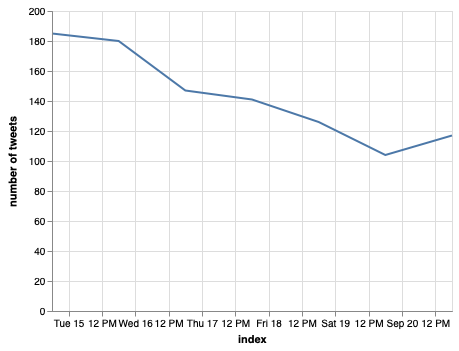

In [118]:
alt.Chart(user_engagement_df.reset_index()).mark_line().encode(
    x='index',
    y='number of tweets',
)

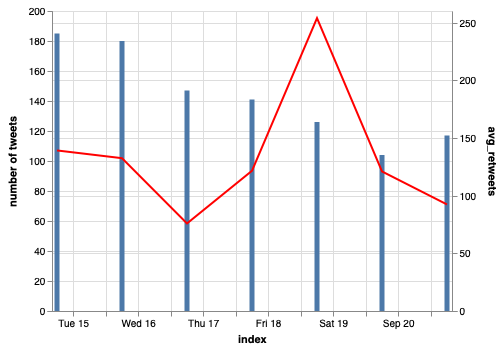

In [128]:
base = alt.Chart(user_engagement_df.reset_index()).encode(
    alt.X('index:T',
        #axis=alt.Axis(format='%b'),
        scale=alt.Scale(zero=False)
    )
)

bar = base.mark_bar().encode(
    y='number of tweets:Q'
)


line =  base.mark_line(color='red').encode(
    y='avg_retweets:Q',
)

alt.layer(
    bar,
    line
).resolve_scale(
    y='independent'
).interactive()

In [41]:
df['twitter_lang'].value_counts()

en     927
fr      29
und      8
ja       5
es       5
de       5
it       4
in       2
ro       2
pt       2
da       1
fa       1
nl       1
et       1
tr       1
lv       1
th       1
ar       1
sl       1
ur       1
cy       1
Name: twitter_lang, dtype: int64

In [43]:
df_body = df['body']
df_body.head()

0    no, these are belated responses against muslim...
1    rt @soccerst_: the refugee who was kicked by a...
2    to understand the demands of the 'refugee welc...
3    refugee crisis to test eu itself at summit of ...
4    #news #stocks rpt--u.n. refugee hunger-relief ...
Name: body, dtype: object

In [44]:
r = df_body.str.count('refugee').value_counts()

r_total = df_body.str.contains('refugee').sum()

print("Total number of times 'refugee' appears in all week02 tweets: " + str(r_total))
print("\nNumber of times 'refugee' appears within a tweet: " + str(r))

Total number of times 'refugee' appears in all week02 tweets: 588

Number of times 'refugee' appears within a tweet: 1    522
0    412
2     66
Name: body, dtype: int64


In [45]:
a = df_body.str.count('asylum').value_counts()

a_total = df_body.str.contains('asylum').sum()

print("Total number of times 'asylum' appears in all week02 tweets: " + str(a_total))
print("\nNumber of times 'asylum' appears within a tweet: " + str(a))

Total number of times 'asylum' appears in all week02 tweets: 113

Number of times 'asylum' appears within a tweet: 0    887
1    111
2      2
Name: body, dtype: int64


In [47]:
m = df_body.str.count('migrant').value_counts()

m_total = df_body.str.contains('migrant').sum()

print("Total number of times 'migrant' appears in all week09 tweets: " + str(m_total))
print("\nNumber of times 'migrant' appears within a tweet: " + str(m))

Total number of times 'migrant' appears in all week09 tweets: 266

Number of times 'migrant' appears within a tweet: 0    734
1    245
2     19
3      2
Name: body, dtype: int64
